# AMAT 502: Modern Computing for Mathematicians
## Lecture 9 - OOP for Mortgages and Intro to MatplotLib
### University at Albany SUNY

# Topics for Today

- Understanding the Mortgage Crisis of 2008
- Deriving Formulas for Amortization Schedules
- Plotting with `matplotlib`

# The Mortgage Crisis of 2008

In 2008, a collapse in prices for homes in the United States triggered the great recession that affected financial markets worldwide. I'd recommend watching this [Crash Course in Economics episode](https://youtu.be/GPOv72Awo68), the movie "The Big Short" and this [Youtube Summary of "The Big Short"](https://youtu.be/csQUNX-xnBc).

There were many things that contibuted to this economic meltdown, but one of the main causes was that many large banks and hedge funds bought tranches and collatoralized debt obligations (CDOs) that packaged debt in the form of high-risk debt, such as unaffordable mortgages, that were very unlikely to be paid off, with "good debt" that was more likely to be paid off. Normally rating agencies such as Standard and Poors (S&P) warn traders about risk, but questionable practices made it okay to give the top "AAA" rating to bad mortgage-backed securities.

Many of these questionable trading practices seemed okay as long at the housing market kept growing. However to keep the housing market growing, banks encouraged people to buy more and more expensive homes without caring whether some people would default or not because they could always repossess the house along with any money already paid.

## The Mortgage Crisis, continued

One way to keep the housing market growing was to make sure people kept buying houses of increasing value. It was thus in the bank's interest to make large loans seem more accessible. This was done through variations on the typical mortgage:

- A fixed rate 15 or 30 year mortgage has fixed monthly payments, which we'll review next.
- A fixed rate mortgage where you've gotten a lower interest rate by purchasing "points," i.e. by paying an additional 1% of the total loan up front.
- A mortgage with an initial "teaser rate" that then increases to a higher rate later.


# The "Miracle" of Compound Interest

> In 1785 a French mathematician named Charles Joseph Mathon de la Cour wrote a parody of Benjamin Franklin’s “Poor Richard’s Almanac” in which he mocked the unbearable spirit of American optimism represented by Franklin. The Frenchman fictionalized about “Fortunate Richard” leaving a small sum of money in his will to be used only after it had collected interest for 500 years.

> Franklin, who was 79 at the time, wrote back to de la Cour, thanking him for the great idea and telling him that he had decided to leave a bequest to his native Boston and his adopted Philadelphia of 1,000 pounds to each, on the condition that it be placed in a fund that would gather interest and support the public good for the succeeding 200 years. [From Money Mastery](https://moneymastery.com/benjamin-franklins-experiment-with-compound-interest-will-astound-you/)



## Review of Compound Interest

Suppose you take out a loan of amount $P$, which accrues interest at a monthly rate $r$. The amount you owe after each month, if you make no payments, forms a geometric progression:

$$P, \qquad P(1+r), \qquad P(1+r)^2, \qquad P(1+r)^3, \qquad \ldots \qquad P(1+r)^N$$

#### Conceptual Question:

Suppose I borrow (or invest) two different amounts $P$ and $P'$ where $P'-P = \Delta > 0$. **How does the difference between these two loans (or value of these two investments) grow with time?**

## Mortgage Payment Calculation Derivation
In contrast to pure compound interest, a monthly payment $M$ allows you to reduce the amount of principal (and interest!) that would accrue. Let's see how this works, step by step.

- At time 0, you take out a loan of principal amount $P_0$
- After one month, you've accrued $P_0 r$ amount of interest, but you make you first monthly payment $M$. You now have $$P_1=P_0 - (M - P_0r) = P_0(1+r) - M$$ principal left. Notice that $M > P_0r$ otherwise you'll never pay down the principal. Banks would be fine with this, but it would leave you perpetually in debt.


## Mortgage Payment Calculation Derivation

- Now we repeat the previous calculation. After two months your new principal would be 
$$P_2=P_1 - (M - P_1r)=P_1(1+r) - M = (P_0(1+r) - M)(1+r) - M$$

$$= P_0(1+r)^2 - M(1+r) - M$$

In general, after $k$ months, your principal would be $$P_k=P_0(1+r)^k - M(1+r)^{k-1}-M(1+r)^{k-2} - \cdots - M$$

$$=P_0(1+r)^k - M(\sum_{j=0}^{k-1} (1+r)^j)$$

## Mortgage Payment Calculation continued

Recall the formula for the sum of a geometric series: $$ 1 + x + x^2 + x^3 + \cdots = \sum_{j=0}^{\infty} x^j = \frac{1}{1-x}$$

And note that $$ 1 + x + x^2 + x^3 + \cdots + x^{k-1} + x^{k} + x^{k+1} + \cdots = 1 + x + x^2 + x^3 + \cdots + x^{k-1} + x^k(1+ x + x^2 + x^3 + \cdots )$$

So we know the partial sum fits into the equation $$ 1 + x + x^2 + x^3 + \cdots + x^{k-1} + \frac{x^k}{1-x} = \frac{1}{1-x} $$ and thus $$1 + x + x^2 + x^3 + \cdots + x^{k-1} = \frac{1-x^k}{1-x}$$


## Mortgage Payment Calculation continued

Setting $1+r=x$ we get that $$\sum_{j=0}^{k-1} (1+r)^j=\frac{(1+r)^k-1}{r}$$ and using the fact that afer $N$ months the amount left to repay should be 0, we get
$$P_N = 0 = P_0(1+r)^N - M(\sum_{j=0}^{N-1} (1+r)^j) = P_0(1+r)^N - M(\frac{(1+r)^N-1}{r})$$
Which in turn implies that the monthly repayment rate for a loan with monthly interest $r$ is
$$M=\frac{P_0(1+r)^Nr}{(1+r)^N-1}$$

In [12]:
#From Guttag's expanded revised edition, pg. 109

def findPayment(loan,r,m):
    """Assumes: loan and r are floats, m an int
     Returns the monthly payment for a mortgage of size
     loan at a monthly rate of r for m months"""
    return loan*(r*(1+r)**m)/((1+r)**m -1)

class Mortgage(object):
    """Abstract class for building different kinds of mortgages"""
    
    def __init__(self, loan, annRate, months):
        """Assumes: loan and annRate are floats, months an int.
        Creates a new mortgage of size loan, duration months, and
        annual rate annRate"""
        self.loan = loan
        self.rate = annRate/12.0
        self.months = months
        self.paid = [0.0]
        self.owed = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None #description of mortgage
        
    def makePayment(self):
        """Make a payment"""
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1]*self.rate
        self.owed.append(self.owed[-1] - reduction) #remember that [-1] returns the last element of a list
    
    def getTotalPaid(self):
        """Return the total amount paid so far"""
        return sum(self.paid)
    
    def __str__(self):
        return self.legend

In [3]:
#Following Guttag, we define three subclasses of Mortgage

class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months) 
        self.legend = 'Fixed, ' + str(r*100) + '%'

class FixedWithPts(Mortgage):
    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months) 
        self.pts = pts
        self.paid = [loan*(pts/100.0)]
        self.legend = 'Fixed, ' + str(r*100) + '%, ' + str(pts) + ' points'
        
class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months) 
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.0
        self.legend = str(teaserRate*100) + '% for ' + str(self.teaserMonths) + ' months, then ' + str(r*100) + '%' 
        
    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate, self.months - self.teaserMonths) 
        Mortgage.makePayment(self)

In [14]:
def compareMortgages(amt, years, fixedRate, pts, ptsRate, 
                     varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    for m in morts:
        print(m)
        print(' Total payments = $' + str(int(m.getTotalPaid())))

compareMortgages(amt=200000, years=30, fixedRate=0.045, 
                 pts = 3.25, ptsRate=0.035, varRate1=0.025, 
                 varRate2=0.06, varMonths=48)

Fixed, 4.5%
 Total payments = $364813
Fixed, 3.5000000000000004%, 3.25 points
 Total payments = $329812
2.5% for 48 months, then 6.0%
 Total payments = $396101


## In-Class Exercise

Create two mortgages: 

   1) a fixed 5% loan for 30 years and 
   
   2) a "teaser mortgage" that has a 3.5% rate for 5 years and then 7% for the remaining 25 years

**Compute how much is owed on each loan after 5, 10, 15, and 20 years.** 


# Introduction to Matplotlib

It would be very useful to visualize some of the output that we're producing in the analysis of mortgage data.

Consequently we're going to unravel some of the workings of plotting in Python.

Guttag uses PyLab, but this has become out of date, so we're going to follow [VanderPlas's Introduction to MatPlotLib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) at times instead.

The transition from Guttag to VanderPlas is not difficult because **everywhere you see a reference to PyLab, just change it to PyPlot (abbreviated as plt).**

However at this point we are going to start using **NumPy** as well.

In [44]:
a =[i for i in range(0,10)]
2*a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [48]:
np.pi

3.141592653589793

In [52]:
b = np.linspace(0,10,11)
#np.exp(b)
2*b

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

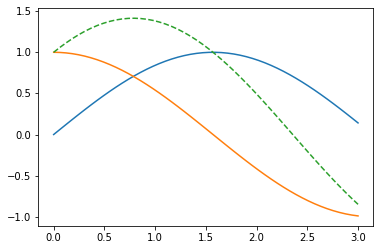

In [41]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3)  #You want to think of this as a list/array
#print(type(x))
fig = plt.figure()
#print(type(fig))
#like a call to the figure method in the PyPlot, which initializes the figure
plt.plot(x, np.sin(x)) 
plt.plot(x, np.cos(x))
#plt.plot(x,x)
#plt.plot(x,.1*np.exp(x))
plt.plot(x,np.sin(x)+np.cos(x),'--');#notice the semicolon!
#note that just like in Matlab, plots take in arrays
#and functions evaluated at each point in the array to produce the appearance of a curve

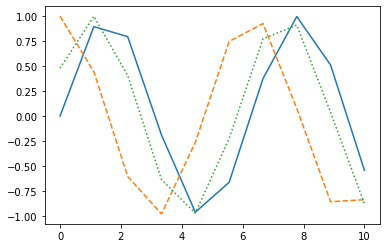

In [24]:
#lets see what happens when we coarsen the underlying array
y=np.linspace(0, 10, 10)

fig2 = plt.figure() 
#like a call to the figure method in the PyPlot, which initializes the figure
plt.plot(y, np.sin(y), '-') 
plt.plot(y, np.cos(y), '--')
plt.plot(y,np.sin(y+.5),':'); #notice the semicolon

In [25]:
fig2.savefig('my_first_figure.png')

#from IPython.display import Image
#Image('my_figure.png')

## Plotting from the Mortgage Class

Now let's return to some of the features of interest that we considered when earlier in lecture.

26532.977051444203

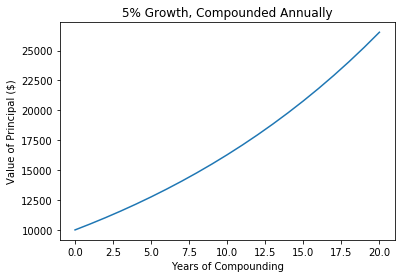

In [26]:
principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate

fig = plt.figure()
plt.plot(values)
plt.title('5% Growth, Compounded Annually')
plt.xlabel('Years of Compounding')
plt.ylabel('Value of Principal ($)')

values[-1]

## Augmenting the Mortgage Class

Let's introduce a few more methods in our mortgage class to take advantage of our new plotting capabilities.

In [27]:
class Mortgage(object):
    """Abstract class for building different kinds of mortgages"""
    
    def __init__(self, loan, annRate, months):
        """Assumes: loan and annRate are floats, months an int.
        Creates a new mortgage of size loan, duration months, and
        annual rate annRate"""
        self.loan = loan
        self.rate = annRate/12.0
        self.months = months
        self.paid = [0.0]
        self.owed = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None #description of mortgage
        
    def makePayment(self):
        """Make a payment"""
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1]*self.rate
        self.owed.append(self.owed[-1] - reduction) #remember that [-1] returns the last element of a list
    
    def getTotalPaid(self):
        """Return the total amount paid so far"""
        return sum(self.paid)
    
    def __str__(self):
        return self.legend
    
    def plotPayments(self, style):
        plt.plot(self.paid[1:], style, label = self.legend)

    def plotBalance(self, style):
        plt.plot(self.owed, style, label = self.legend)

    def plotTotPd(self, style):
        """Plot the cumulative total of the payments made"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        plt.plot(totPd, style, label = self.legend)

    def plotNet(self, style):
        """Plot an approximation to the total cost of the mortgage
        over time by plotting the cash expended minus the equity
        acquired by paying off part of the loan"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
            #Equity acquired through payments is amount of original loan
            # paid to date, which is amount of loan minus what is still owed
        equityAcquired = np.array([self.loan]*len(self.owed))
        equityAcquired = equityAcquired - np.array(self.owed)
        net = np.array(totPd) - equityAcquired
        plt.plot(net, style, label = self.legend)

In [28]:
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed, ' + str(r*100) + '%'

class FixedWithPts(Mortgage):
    
    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100.0)]
        self.legend = 'Fixed, ' + str(r*100) + '%, '\
                    + str(pts) + ' points'
class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.0
        self.legend = str(teaserRate*100)\
                + '% for ' + str(self.teaserMonths)\
                + ' months, then ' + str(round(r*100,2)) + '%'
    
    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate, self.months - self.teaserMonths)
        
        Mortgage.makePayment(self)

In [29]:
def plotMortgages(morts, amt):
    styles = ['b-', 'b-.', 'b:']
    #Give names to figure numbers
    payments = 0
    cost = 1
    balance = 2
    netCost = 3
    plt.figure(payments)
    plt.title('Monthly Payments of Different $' + str(amt)+ ' Mortgages')
    plt.xlabel('Months')
    plt.ylabel('Monthly Payments')
    plt.figure(cost)
    plt.title('Cash Outlay of Different $' + str(amt) + ' Mortgages')
    plt.xlabel('Months')
    plt.ylabel('Total Payments')
    plt.figure(balance)
    plt.title('Balance Remaining of $' + str(amt) + ' Mortgages')
    plt.xlabel('Months')
    plt.ylabel('Remaining Loan Balance of $')
    plt.figure(netCost)
    plt.title('Net Cost of $' + str(amt) + ' Mortgages')
    plt.xlabel('Months')
    plt.ylabel('Payments - Equity $')
    
    for i in range(len(morts)):
        plt.figure(payments)
        morts[i].plotPayments(styles[i])
        plt.figure(cost)
        morts[i].plotTotPd(styles[i])
        plt.figure(balance)
        morts[i].plotBalance(styles[i])
        plt.figure(netCost)
        morts[i].plotNet(styles[i])
 
    plt.figure(payments)
    plt.legend(loc = 'upper center')
    plt.figure(cost)
    plt.legend(loc = 'best')
    plt.figure(balance)
    plt.legend(loc = 'best')
    
def compareMortgages(amt, years, fixedRate, pts, ptsRate,varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    plotMortgages(morts, amt)

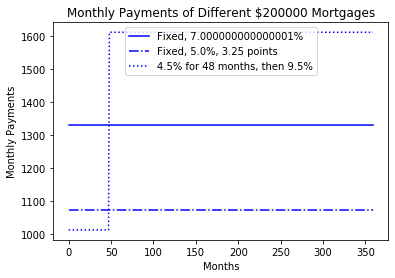

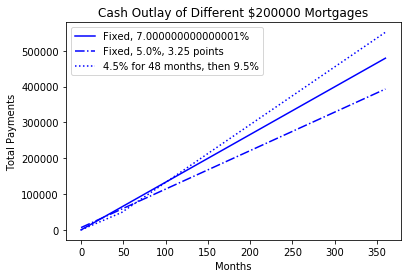

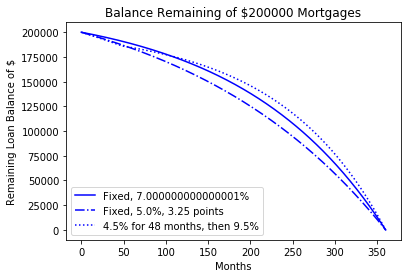

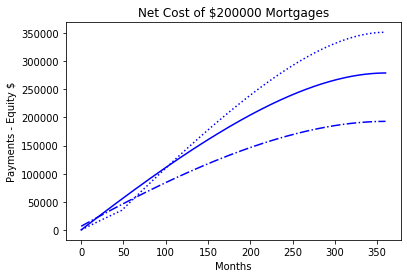

In [30]:
compareMortgages(amt=200000, years=30, fixedRate=0.07, 
                 pts = 3.25, ptsRate=0.05,varRate1=0.045, 
                 varRate2=0.095, varMonths=48)

## In-Class Exercises

1) Navigate to [VanderPlas's Section on Simple Line Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html) and **modify the compareMortgages function so that the graphs of each mortgage type get a different color**

2) Once you're done with that, modify the loan and rate amounts. **How can you modify the loan and rate and teaser periods to make the graphs very different?**